**Collaborative Filtering :**


Collaborative filtering is used by most recommendation systems to find similar patterns or information of the users, this technique can filter out items that users like on the basis of the ratings or reactions by similar users.

An example of collaborative filtering can be to predict the rating of a particular user based on user ratings for other movies and others’ ratings for all movies. This concept is widely used in recommending
movies, news, applications, and so many other items.


In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import pairwise_distances

### Loading The Dataset

In [ ]:
f = open(r"C:\Users\pankaj.balchandani\Downloads\yelp_dataset\yelp_dataset\yelp_academic_dataset_business.json","rb")
f2 = open(r"C:\Users\pankaj.balchandani\Downloads\yelp_dataset\yelp_dataset\yelp_academic_dataset_review.json","rb")
l = []
l2 = []

for line in f:
    l.append(json.loads(line))
for line in f2:
    l2.append(json.loads(line))


#### Looking at the Dataset

In [ ]:
df1 = pd.DataFrame(l)
df1.head(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
df3 = pd.DataFrame(l2)
df3.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


## Grouping users to see relations

In [ ]:
business_ranks = df3.groupby(['user_id']).agg({'stars':np.mean}).sort_values(['stars'],ascending = False)

In [ ]:
business_ranks.value_counts()

stars   
5.000000    754035
1.000000    347434
4.000000    179994
3.000000    135246
2.000000    100312
             ...  
3.646643         1
3.646465         1
3.646018         1
4.121387         1
4.985294         1
Length: 7540, dtype: int64

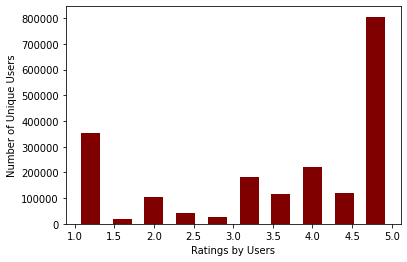

In [ ]:
#PLotting our findings
plt.hist(business_ranks,rwidth = 0.6, color = 'maroon')
plt.xlabel('Ratings by Users')
plt.ylabel('Number of Unique Users')
plt.show()

## Grouping Businesses to see relations

In [ ]:
business_ranks1 = df3.groupby(['business_id']).agg({'stars':np.mean}).sort_values(['stars'],ascending = False)

In [ ]:
business_ranks1.value_counts()

stars   
5.000000    8995
4.000000    3885
3.000000    2794
4.200000    2039
4.333333    1892
            ... 
4.251908       1
4.251969       1
3.659259       1
3.659218       1
3.783550       1
Length: 17055, dtype: int64

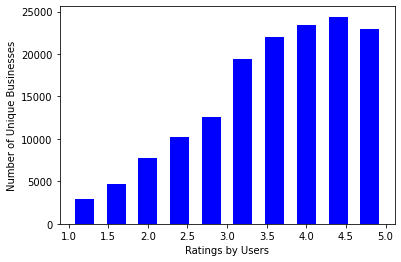

In [ ]:
# Plotting our findings
plt.hist(business_ranks1,rwidth = 0.6, color = 'blue')
plt.xlabel('Ratings by Users')
plt.ylabel('Number of Unique Businesses')
plt.show()

In [ ]:
business_ranks2 = df3.groupby(['business_id']).agg({'user_id':'count','stars':np.mean}).sort_values(['stars'],ascending = False)

In [ ]:
business_ranks2

,user_id,stars
business_id,,
32u7cquDfOX8Cbii25g0mg,8,5.0
FRuS-Lhn5GZTYg-J1hn9kA,7,5.0
3PtXF_Kzq6v_WMqlJ1OaBQ,14,5.0
ZcR-DlAbLmM5WQkNTOi0nA,5,5.0
lLIb3WzjiMeARikxS3Iosg,7,5.0
...,...,...
mzsSZP8CLJKrxV9a-e-FMg,7,1.0
qe0i3Q1NbbHrJsrQCJdP6g,7,1.0
mzHp77kQ9wLJDTJWH7gl_w,10,1.0


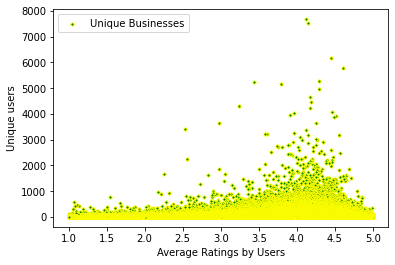

In [ ]:
# Plotting Our Findings
plt.scatter(business_ranks2['stars'],business_ranks2['user_id'],c = 'green' ,s = 10,marker = 'o',edgecolor ="yellow",label = 'Unique Businesses')
plt.legend()
plt.xlabel('Average Ratings by Users')
plt.ylabel('Unique users')
plt.show()

In [ ]:
len(df3['user_id'].unique()),len(df3['business_id'].unique())

(1987929, 150346)

### Taking into consideration only for top 1000 users and top 1000 businesses

In [ ]:
df = pd.DataFrame()
df['user_id'] = df3['user_id'].value_counts()[:1000].index
df['business_id'] = df3['business_id'].value_counts()[:1000].index

In [ ]:
##merging datasets for all those 1000 users from both datasets
df3_new = df3.merge(df[['user_id']],on = ['user_id'] ,how = 'inner')

In [ ]:
df3_new = df3_new[df3_new.business_id.isin(df['business_id'])]

In [ ]:
stars_df = pd.DataFrame(np.zeros((1000,1000)),columns = df['business_id'], index=df['user_id'])

In [ ]:
for i in df3_new.index:
    stars_df.loc[df3_new['user_id'][i] , df3_new['business_id'][i] ]  =  df3_new['stars'][i] 

In [ ]:
## Creating User Item Matrix 
# For our recommendation system 

stars_df

business_id,_ab50qdWOk0DdB6XOrBitw,ac1AeYqs8Z4_e2X5M3if2A,GXFMD0Z4jEVZBCsbPf4CTQ,ytynqOUb3hjKeJfRj5Tshw,oBNrLz4EDhiscSlbOl8uAw,iSRTaT9WngzB8JJ2YKJUig,VQcCL9PiNL_wkGf-uF3fjg,_C7QiQQc47AOEv4PE3Kong,GBTPC53ZrG1ZBY3DT8Mbcw,6a4gLLFSgr-Q6CZXDLzBGQ,...,zSqTndm5Alq9dW1PyzbdTA,sXaiyPC1fT6ESl-6t7eSXg,8ObCdQQ3mHwDsSsk75Z2lA,Hr6aM0s-woIJaW6DJSbvNQ,lrowppSl2sk3hU4tSUaS6Q,IG2KelKEHCwybPl98frdgQ,oaboaRBUgGjbo2kfUIKDLQ,XCY5mYQv-6Y-uOZEOgOhiQ,05UGAUzE88mcPxQ7WnCxQA,tc6jKQiRjFO2M7BylwHVrg
user_id,,,,,,,,,,,,,,,,,,,,,
_BcWyKQL16ndpBdggh2kNA,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Xw7ZjaGfr0WNVt6s_5KZfA,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0Igx-a1wAstiBDerGxXk2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-G7Zkl1wIWBBmD0KRy_sCw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ET8n-r7glWYqZhuR6GcdNw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Glq_5Fn45I4HkNqRhfuDkw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4aCF363Weu2RNAtl3mJ2eg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
x7UU1bdc2INFrZFwp6yOPw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Checking for sparcity in the matrix

sparsity = float(len(np.array(stars_df).nonzero()[0]))
sparsity /= (stars_df.shape[0] * stars_df.shape[1])
sparsity *= 100
print('{:.2f}%'.format(sparsity))

3.13%


In [ ]:
## creating a fucntion to select the 30 testing ratings  and renaining training ratings for each user

MIN_USER_RATINGS = 70
DELETE_RATING_COUNT = 30

def train_test_split(ratings):

    validation = np.zeros(ratings.shape)
    train = ratings.copy()

    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) >= MIN_USER_RATINGS:
            val_ratings = np.random.choice(
              ratings[user, :].nonzero()[0],
              size=DELETE_RATING_COUNT,
              replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [ ]:
## Splitting Data using the previously created function into train and validation split
train, val = train_test_split(np.array(stars_df))

In [ ]:
### Function for Root Mean Square Error Calculation

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

Creating Recommendation System

## Using this loss function to calculate latent vectors for our recommendation system. 

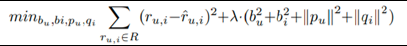

In [ ]:
### Recommender system Class

class Recommender:
  #constructor
  def __init__(self, n_epochs=50, n_latent_features=3, lmbda=0.1, learning_rate=0.01):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  #calculating predictions

  def predictions(self, P, Q):
    return np.dot(P.T, Q)
  
  # Training the model 
  def fit(self, X_train, X_val):
    m, n = X_train.shape

    self.P = 3 * np.random.rand(self.n_latent_features, m)
    self.Q = 3 * np.random.rand(self.n_latent_features, n)
    
    self.train_error = []
    self.val_error = []

    users, items = X_train.nonzero()
    
    for epoch in range(self.n_epochs):
        for u, i in zip(users, items):
            error = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
            self.P[:, u] += self.learning_rate * (error * self.Q[:, i] - self.lmbda * self.P[:, u])
            self.Q[:, i] += self.learning_rate * (error * self.P[:, u] - self.lmbda * self.Q[:, i])

        train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
        val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
        self.train_error.append(train_rmse)
        self.val_error.append(val_rmse)
        print(f"Epoch - {epoch+1} --------------> Train RMSE - {train_rmse} -----------------> Validation RMSE - {val_rmse}")
        
    return self
  # predicting using the trained model
  def predict(self, X_train, user_index , wise = 'user'):
    y_hat = self.predictions(self.P, self.Q)
    predictions_index = np.where(X_train[user_index, :] == 0)[0]
    if wise == 'user':
        return y_hat[user_index, predictions_index].flatten()
    return y_hat[user_index].flatten()

In [ ]:
## Model Training 
recommender = Recommender().fit(train, val)

Epoch - 1 --------------> Train RMSE - 1.60175346622024 -----------------> Validation RMSE - 1.8097290460072684
Epoch - 2 --------------> Train RMSE - 1.0551791921841078 -----------------> Validation RMSE - 1.0087503165597493
Epoch - 3 --------------> Train RMSE - 0.9272112675303142 -----------------> Validation RMSE - 0.8822349921271432
Epoch - 4 --------------> Train RMSE - 0.8776331525279404 -----------------> Validation RMSE - 0.8443649883827338
Epoch - 5 --------------> Train RMSE - 0.8516627310885281 -----------------> Validation RMSE - 0.8267439446464748
Epoch - 6 --------------> Train RMSE - 0.8358787874797798 -----------------> Validation RMSE - 0.8168071195539696
Epoch - 7 --------------> Train RMSE - 0.8253918442719089 -----------------> Validation RMSE - 0.8106226071244832
Epoch - 8 --------------> Train RMSE - 0.817983238002545 -----------------> Validation RMSE - 0.8065424204380334
Epoch - 9 --------------> Train RMSE - 0.8124998954700731 -----------------> Validation RMS

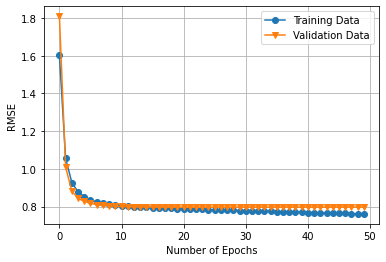

In [ ]:
## Plotting Training and Testing Accuracy

plt.plot(range(recommender.n_epochs), recommender.train_error, marker='o', label='Training Data');
plt.plot(range(recommender.n_epochs), recommender.val_error, marker='v', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [ ]:
## Creating User Based Recommendation System
def user_user_recommendation(user_index, predicted_stars_index ,predicted_stars, n=10):

    business_ids = stars_df.iloc[:,predicted_stars_index].columns
    # Predicting for the user index 
    rating_predictions = recommender.predict(train, user_index)
    #creating a dataframe for restraunts with stars and sorting the values to get the restaurants with most number of stars 
    business_stars = pd.DataFrame(data=dict(business_id=business_ids, stars=rating_predictions))
    top_n_businesses = business_stars.sort_values("stars", ascending=False).head(n)
    business_recommendations = df1[df1.business_id.isin(top_n_businesses.business_id)].reset_index(drop=True)
    return business_recommendations.sort_values("stars", ascending=False)[['name','stars']]

In [ ]:
#recommending restraunts for the user with user_id ->
user_id = '_BcWyKQL16ndpBdggh2kNA'
user_index = stars_df.index.get_loc(user_id)
rating_predictions = recommender.predict(train, user_index)
predictions_index = np.where(train[user_index, :] == 0)[0]
predicted_stars_index = np.where(train[user_index, :] == 0)[0]
predicted_stars = train[user_index, predicted_stars_index]

In [ ]:
user_user_recommendation(user_index, predicted_stars_index, predicted_stars)

,name,stars
0,Yah Mon,4.5
1,Cajun Encounters Tour Company,4.5
3,Gallier Restaurant & Oyster Bar,4.5
6,Witches Brew Tours,4.5
9,Loquita,4.5
4,Finch & Fork,4.0
8,Olio Pizzeria,4.0
7,Fess Parker's DoubleTree Resort,3.0
5,Mar Monte Hotel - Hyatt,2.5
2,Goedeker's,1.5


These are the 10 best restaurants that have been recommended for the user using user based collaborative filtering

In [ ]:
train.shape , val.shape

((1000, 1000), (1000, 1000))

In [ ]:
## Creating Item - Item Similarity Matrix
dist  = pairwise_distances(stars_df.T , metric = 'cosine')

In [ ]:
#Creating a item based recommendation system and putting it inside a function
def item_item_recommendation(user_index, predicted_stars_index ,predicted_stars, business, n=10):
    
    business_ids = stars_df.columns
    # predicting at the user index
    rating_predictions = recommender.predict(train, user_index, wise = 'item')
    rating_predictions = rating_predictions.dot(dist) / np.array(np.abs(dist).sum(axis =1))

    #extracting the item_id for the corresponding 
    index = list(df[df['business_id'] == business].index)[0]
    
    center = rating_predictions[index]
    rating_pred = np.abs(rating_predictions[index] - rating_predictions)
    
    #Creating a datframe for restaurants with stars and sorting the values to get the restaurants with most number of stars 

    business_stars = pd.DataFrame(data=dict(business_id=business_ids, stars=rating_pred))
    
    business_stars = business_stars[~business_stars['business_id'].isin(stars_df.iloc[:,predicted_stars_index].columns)]
    business_stars = business_stars[business_stars['business_id']!= business]
    top_n_businesses = business_stars.sort_values("stars").head(n)
    
    business_recommendations = df1[df1.business_id.isin(top_n_businesses.business_id)].reset_index(drop=True)
    return business_recommendations.sort_values("stars", ascending=False)[['name','stars']]

In [ ]:
# recommending restraunts for the user with user_id
existing_stars_index = np.where(train[user_index, :] == 0)[0]
existing_stars = train[user_index, existing_stars_index]

# With business id  _ab50qdWOk0DdB6XOrBitw
item_item_recommendation(user_index, existing_stars_index, existing_stars , business = '_ab50qdWOk0DdB6XOrBitw')

,name,stars
1,Zahav,4.5
2,Mama's Vegetarian,4.5
4,Morimoto,4.5
7,Double Knot,4.5
9,Vedge,4.5
0,HipCityVeg,4.0
3,Tinto,4.0
5,Audrey Claire,4.0
6,Fork,4.0
8,Federal Donuts,4.0


These are the 10 best restaurants that have been recommended for the user using Item based collaborative filtering.